In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [4]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pmdarima.arima import auto_arima

In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv("covidData.csv")
data.head(5)

,Date,India,USA
0,2020-01-30,1,5
1,2020-01-31,1,6
2,2020-02-01,1,7
3,2020-02-02,2,8
4,2020-02-03,2,11


In [9]:
print("Size/Shape of the dataset ", data.shape)
print("Checking for null values ", data.isnull().sum())
print("Checking Data - type ", data.dtypes)

Size/Shape of the dataset  (301, 3)
Checking for null values  Date     0
India    0
USA      0
dtype: int64
Checking Data - type  Date     object
India     int64
USA       int64
dtype: object


In [10]:
#Dropping
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [11]:
data.head(5)

,Date,India,USA
0,2020-01-30,1,5
1,2020-01-31,1,6
2,2020-02-01,1,7
3,2020-02-02,2,8
4,2020-02-03,2,11


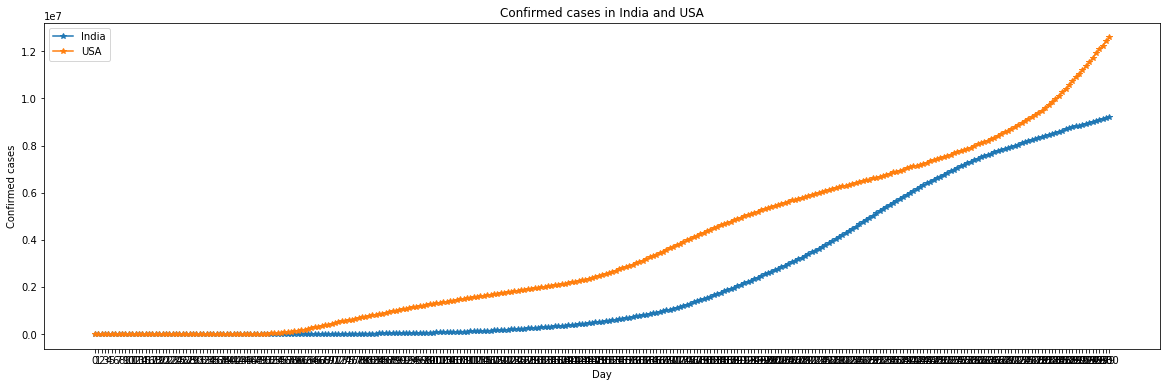

In [12]:
for j in range(1, 2):
    plt.figure(figsize=(20,6))
    for tt in data.columns[1:3]:
        cases = data[[tt]]
        cases = cases.reset_index(drop=True)
        cases = cases.rolling(2).mean().fillna(0)
        plt.plot([str(i) for i in cases[tt].index], data[tt], marker = '*', label = tt)
    
    plt.title("Confirmed cases in India and USA")
    plt.legend()
    plt.xlabel('Day')
    plt.ylabel('Confirmed cases')
    plt.show()

In [13]:
mse_list = []
best_pair = {}
for tt in data.columns:
    selected = []
    cases = data[[tt]]
    cases = cases.reset_index(drop = True)
    cases_list1 = cases.iloc[:, 0].values
    for rj in data.columns:
        if rj != tt:
            cases1 = data[[rj]]
            cases1 = cases1.reset_index(drop=True)
            cases_list2 = cases.iloc[:,0].values
            if len(cases_list1) < len(cases_list2):
                corr = np.corrcoef(cases_list1, cases_list2[:len(cases_list1)])[0, 1]
                mse = (np.square(cases_list1 - cases_list2[:len(cases_list1)])).mean()
                mse_list.append(mse)
                if((mase <9000) & (corr >.7)):
                    if len(cases1[rj]) > len(cases[tt])+7:
                        plt.figure(figSize=(21,6))
                        plt.plot([str(i) for i in cases[tt].index], cases[tt], marker = '*', label=tt)
                        plt.plot([str(i) for i in cases1[rj].index], cases1[rj], marker = '*', label=rj)
                        plt.title("Correlation {}, MSE {}".format(round(corr*100, 2), mse))
                        plt.legend()
                        plt.xlabel('Day')
                        plt.ylabel('Confirmed Cases')
                        plt.show()
                        selected.append(cases_list2[:len(cases_list1) + 7])
    if len(selected)>0:
        best_pair[tt] = selected

In [14]:
print(data[["India"]])

       India
0          1
1          1
2          1
3          2
4          2
..       ...
296  9050597
297  9095806
298  9139865
299  9177840
300  9222216

[301 rows x 1 columns]


In [15]:
cases = data[["India"]]
Y = cases[cases["India"] > 0].reset_index(drop = True).iloc[:, 0].values
print(Y)

[      1       1       1       2       2       3       3       3       3
       3       3       3       3       3       3       3       3       3
       3       3       3       3       3       3       3       3       3
       3       3       3       3       3       3       5       6      28
      29      31      34      34      44      50      73      75      83
      90      93     125     137     165     191     231     320     439
     492     562     649     724     873     979    1071    1251    1397
    1965    2301    2902    3374    4067    4421    5194    5734    6412
    7447    8356    9152   10363   11438   12380   13387   14378   15712
   17265   18600   19984   21393   23077   24506   26496   27892   29435
   31332   33050   35043   37336   39980   42533   46433   49391   52952
   56342   59662   62939   67152   70756   74281   78003   81970   85940
   90927   96169  101139  106750  112359  118447  125101  131868  138845
  145380  151767  158333  165799  173763  182143  1

In [16]:
X = pd.DataFrame(np.vstack(Y).T)
X_train = X.iloc[:len(Y), :].values
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,1,1,1,2,2,3,3,3,3,3,...,8845127,8874290,8912907,8958483,9004365,9050597,9095806,9139865,9177840,9222216


In [17]:

model = auto_arima(Y, trace = True, start_p = 1, start_q = 1, m = 37, start_P = 0, start_Q = 0,
                   max_p = 3, max_q = 3, max_P = 3, max_Q = 3, seasonal = True,
                   stepwise = False, suppress_warnings=True, D = 0, max_D = 3,
                   error_action ='ignore', approximation = False)
                  #random_state = 20, n_fits = 50)

 ARIMA(0,2,0)(0,0,0)[37]             : AIC=5755.849, Time=0.90 sec
 ARIMA(0,2,0)(0,0,1)[37]             : AIC=5716.452, Time=1.74 sec
 ARIMA(0,2,0)(0,0,2)[37]             : AIC=5718.081, Time=9.31 sec
 ARIMA(0,2,0)(0,0,3)[37]             : AIC=5720.913, Time=11.26 sec
 ARIMA(0,2,0)(1,0,0)[37]             : AIC=5728.677, Time=1.16 sec
 ARIMA(0,2,0)(1,0,1)[37]             : AIC=5718.205, Time=1.64 sec
 ARIMA(0,2,0)(1,0,2)[37]             : AIC=inf, Time=21.60 sec
 ARIMA(0,2,0)(1,0,3)[37]             : AIC=5722.538, Time=21.51 sec
 ARIMA(0,2,0)(2,0,0)[37]             : AIC=5724.324, Time=3.67 sec
 ARIMA(0,2,0)(2,0,1)[37]             : AIC=5716.220, Time=27.04 sec
 ARIMA(0,2,0)(2,0,2)[37]             : AIC=inf, Time=40.38 sec
 ARIMA(0,2,0)(2,0,3)[37]             : AIC=5724.386, Time=29.01 sec
 ARIMA(0,2,0)(3,0,0)[37]             : AIC=5716.225, Time=26.09 sec
 ARIMA(0,2,0)(3,0,1)[37]             : AIC=5739.874, Time=14.13 sec
 ARIMA(0,2,0)(3,0,2)[37]             : AIC=5772.648, Time=16.36 

In [18]:
forecast = model.predict(37, exogeneous =X.iloc[len(Y):, :].values)
y_forec, conf_int = model.predict(37, exogenous =X.iloc[len(Y):, :].values, return_conf_int = True, alpha = 0.05)
print('forecast', y_forec, 'confidence interval', conf_int)

forecast [ 9270845.06202767  9315846.04193247  9361515.5403722   9407632.56416201
  9454042.91689144  9501794.5664783   9551554.9474538   9604382.54513817
  9655823.59069881  9706875.711241    9757998.03084395  9809287.15804352
  9861004.9449108   9913392.84459949  9967768.83056091 10020499.89350135
 10073252.58164824 10126267.9225954  10178052.38285196 10231657.15178442
 10285299.65340904 10341656.25016493 10396366.72356063 10451171.46418373
 10506025.25234354 10560677.92426973 10616943.35306085 10676033.62870462
 10735512.62000136 10792815.74438004 10848979.29778758 10904366.44754321
 10959736.20075111 11015483.2786279  11071560.51731761 11129482.62138299
 11186029.79876138] confidence interval [[ 9264761.10169487  9276929.02236047]
 [ 9303383.80653588  9328308.27732906]
 [ 9343492.89539243  9379538.18535196]
 [ 9383737.17210353  9431527.95622049]
 [ 9423610.05920983  9484475.77457305]
 [ 9463977.51106107  9539611.62189552]
 [ 9505397.43684394  9597712.45806365]
 [ 9548859.06599683  

In [19]:
Actual_df = pd.DataFrame(Y, columns =['Actuals'])
for i in ['Forecast', 'Ci_low', 'Ci_high']:
    Actual_df[i] = np.nan
forecast_df = pd.DataFrame(conf_int, columns = ['Ci_low', 'Ci_high'])
forecast_df['forecast'] = y_forec
forecast_df = Actual_df.append(forecast_df).reset_index(drop = True)
forecast_df.tail(40)

,Actuals,Ci_high,Ci_low,Forecast,forecast
298,9139865.0,NaN,NaN,NaN,NaN
299,9177840.0,NaN,NaN,NaN,NaN
300,9222216.0,NaN,NaN,NaN,NaN
301,NaN,9.276929e+06,9.264761e+06,NaN,9.270845e+06
302,NaN,9.328308e+06,9.303384e+06,NaN,9.315846e+06
303,NaN,9.379538e+06,9.343493e+06,NaN,9.361516e+06
304,NaN,9.431528e+06,9.383737e+06,NaN,9.407633e+06
305,NaN,9.484476e+06,9.423610e+06,NaN,9.454043e+06
306,NaN,9.539612e+06,9.463978e+06,NaN,9.501795e+06
307,NaN,9.597712e+06,9.505397e+06,NaN,9.551555e+06


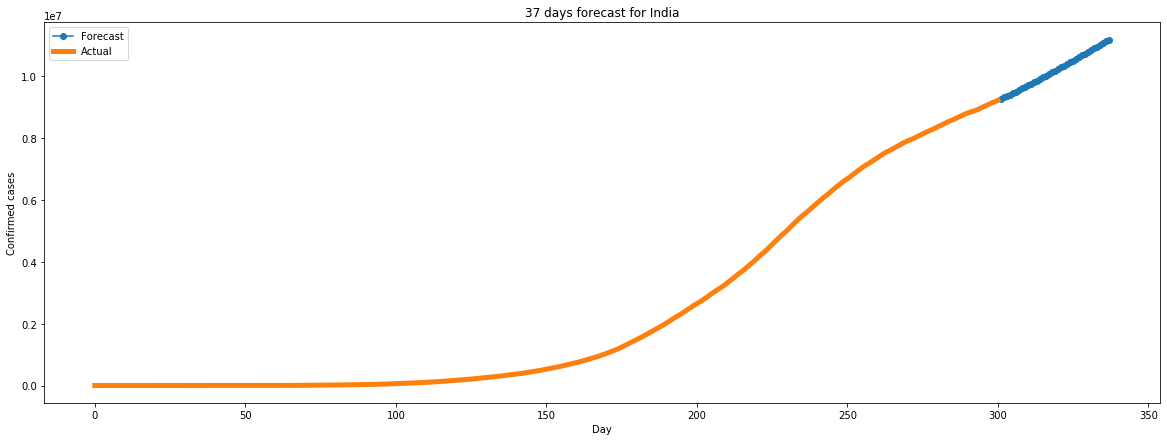

In [20]:
plt.figure(figsize=(20, 7))
plt.plot(forecast_df.index, forecast_df.forecast, '-o')
plt.plot(forecast_df.index, forecast_df.Actuals, linewidth=5)
plt.legend(['Forecast', 'Actual'])
plt.title('37 days forecast for India')
plt.xlabel('Day')
plt.ylabel('Confirmed cases')
plt.show()